## DNS tunneling 
Attacks abuse DNS protocol to sneak malicious traffic past an organization's defenses. By using malicious domains and DNS servers, an attacker can use DNS to evade network defenses and perform data exfiltration.

## Import ML Libraries (DecisionTreeClassifier)

Data source: Kaggle DNS TUNNELING DATASET:https://www.kaggle.com/datasets/saurabhshahane/dns-tunneling-queries-classification


In [ ]:
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

## Visualizing Dataset

In [ ]:
# first 5 rows of training dataset showing dns tunnelling queries
training_data = pd.read_csv("training.csv",names = ['Label', 'Query'])
training_data.head()

,Label,Query
0,1,q+Z8AnwaBA.hidemyself.org.
1,1,q+Z8A3wbBA.hidemyself.org.
2,1,q+Z8BHwcBA.hidemyself.org.
3,1,q+Z8BXwdBA.hidemyself.org.
4,1,q+Z8BnweCORdAGL4+W7DB5xH1cUwcwM1gejAQoJF8hbs2J...


In [ ]:
training_data.shape

(15000, 2)

In [ ]:
# middle 10 rows of training dataset showing genuine dns queries 
training_data[training_data['Label']==0].head(10)

,Label,Query
6000,0,google.com.
6001,0,facebook.com.
6002,0,doubleclick.net.
6003,0,google-analytics.com.
6004,0,akamaihd.net.
6005,0,googlesyndication.com.
6006,0,googleapis.com.
6007,0,googleadservices.com.
6008,0,facebook.net.
6009,0,youtube.com.


In [ ]:
# first 5 rows of test dataset
test_data = pd.read_csv("validating.csv", names = ['Label', 'Query'])
test_data.head()

,Label,Query
0,1,q+aJ04nrBA.hidemyself.org.
1,1,q+aJ1InsBA.hidemyself.org.
2,1,q+aJ1YntBA.hidemyself.org.
3,1,q+aJ1onuCDT2aA0NEkzbTnzRPgWJE7aYtQhjcSmnj74ufU...
4,1,q+aJ14nvCHKAcMCkiIhCb3eY1s8cgWt39jSJuK4299f/S5...


In [ ]:
test_data.shape

(5000, 2)

In [ ]:
# middle 10 rows of dataset showing genuine dns queries 
test_data[test_data["Label"]==0].head(10)

,Label,Query
2000,0,qqmail.com.
2001,0,ultimateclassicrock.com.
2002,0,businessinsider.my.
2003,0,skynet.be.
2004,0,ccgslb.com.cn.
2005,0,lan.com.
2006,0,full.sc.
2007,0,kioskea.net.
2008,0,thevoterguide.org.
2009,0,locationlabs.com.


1    12000
0     3000
Name: Label, dtype: int64


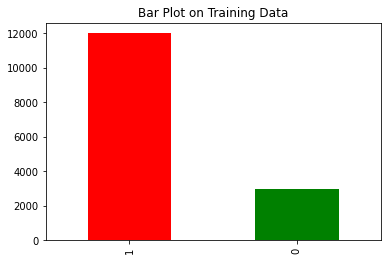

In [ ]:
# statistical counts of genuine and malicious dns queries
counts = training_data['Label'].value_counts()
print(counts)
counts.plot(kind = 'bar',color = ["red","green"])
plt.title('Bar Plot on Training Data')
plt.show()

1    4000
0    1000
Name: Label, dtype: int64


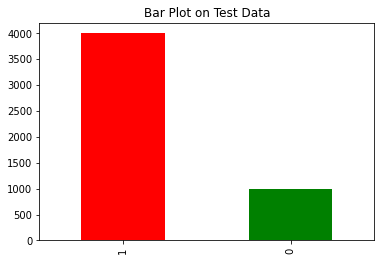

In [ ]:
counts = test_data['Label'].value_counts()
print(counts)
counts.plot(kind = 'bar',color = ["red","green"])
plt.title('Bar Plot on Test Data')
plt.show()

## Calculate Entropy Utility

In [ ]:
'''
Information entropy is a measure of the variations of the components
that make up a message. The proposed method computes the entropy
of the bytes that make up a packet layer or field value (domain).
where p(xi) is the probability of a particular byte occurrence and n is
the number of byte occurrences.
'''

# The higher the entropy score, the more likely a given DNS domain was algorithmically generated.

def calculate_entropy(text):
    if not text: 
        return 0 
    entropy = 0
    for x in range(256): 
        p_x = float(text.count(chr(x)))/len(text) # probability of occurance of each character bit-wise in a domain
        if p_x > 0: 
            entropy += - p_x*math.log(p_x, 2) 
    return entropy

## Generate Entropy for Training Dataset

In [ ]:
# run entropy function on the train dataset and add Entropy column

entropy_train_vals = []

for query in training_data['Query']:
    entropy = calculate_entropy(query)
    entropy_train_vals.append(entropy)
    
training_data['Entropy'] = entropy_train_vals

In [ ]:
# get the first 5 entropy values: featuring high entropy for malicious queries
training_data.head()

,Label,Query,Entropy
0,1,q+Z8AnwaBA.hidemyself.org.,4.363713
1,1,q+Z8A3wbBA.hidemyself.org.,4.363713
2,1,q+Z8BHwcBA.hidemyself.org.,4.363713
3,1,q+Z8BXwdBA.hidemyself.org.,4.286790
4,1,q+Z8BnweCORdAGL4+W7DB5xH1cUwcwM1gejAQoJF8hbs2J...,5.752803


In [ ]:
# entropy values for genuine queries: featuring low entropy
training_data[training_data['Label']==0].head()

,Label,Query,Entropy
6000,0,google.com.,2.663533
6001,0,facebook.com.,3.026987
6002,0,doubleclick.net.,3.500000
6003,0,google-analytics.com.,3.689704
6004,0,akamaihd.net.,3.180833


## Generate Entropy for Test Dataset

In [ ]:
entropy_test_vals = []

for query in test_data['Query']:
    entropy = calculate_entropy(query)
    entropy_test_vals.append(entropy)

test_data['Entropy'] = entropy_test_vals

In [ ]:
test_data.head()

,Label,Query,Entropy
0,1,q+aJ04nrBA.hidemyself.org.,4.363713
1,1,q+aJ1InsBA.hidemyself.org.,4.363713
2,1,q+aJ1YntBA.hidemyself.org.,4.440636
3,1,q+aJ1onuCDT2aA0NEkzbTnzRPgWJE7aYtQhjcSmnj74ufU...,5.838089
4,1,q+aJ14nvCHKAcMCkiIhCb3eY1s8cgWt39jSJuK4299f/S5...,5.832916


In [ ]:
# entropy values for malicious queries: featuring low entropy
test_data[test_data['Label']==0].head()

,Label,Query,Entropy
2000,0,qqmail.com.,2.913977
2001,0,ultimateclassicrock.com.,3.584963
2002,0,businessinsider.my.,3.260828
2003,0,skynet.be.,2.921928
2004,0,ccgslb.com.cn.,2.896292


## Our Model Evaluation Function

In [ ]:
def evaluate(predictions, targets):
    targets = targets.to_numpy()
    
    tp = 0; tn = 0; fp = 0; fn = 0;
    
    for t in range(targets.shape[0]):
        if targets[t] == 0:
            if predictions[t] == 1:
                fp += 1
            else:
                tn += 1
        elif targets[t] == 1:
            if predictions[t] == 1:
                tp += 1
            else:
                fn += 1

    print("True Positives :", tp)
    print("True Negatives :", tn)
    print("False Positives :", fp)
    print("False Negatives :", fn)

## Training the Model using DecisionTree Classifier

### Why  Decision Tree Classifier?
Random Forest Classifier is making many decision trees and is a heavier model. we need a light and fast Tree based model.
Tree based models are effective models for DNS tunnelling detection because they can handle large datasets, complex relationships between features, and can provide interpretable results.

In [ ]:
X_train = training_data['Entropy'] # the training input entropy
Y_train = training_data['Label']   # the corresponding classifying label for training

X_train.head()

0    4.363713
1    4.363713
2    4.363713
3    4.286790
4    5.752803
Name: Entropy, dtype: float64

In [ ]:
X_train, Y_train = shuffle(X_train, Y_train) # to reduce overfitting during training
X_train.ravel() # contiguous array
Y_train.head()

7919     0
13329    1
5872     1
12746    1
14810    1
Name: Label, dtype: int64

In [ ]:
# reshape the training features into unknown rows but 1 column
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)

In [ ]:
start = time.time()

model = DecisionTreeClassifier()   
model.fit(X_train, Y_train)

end = time.time()
print("The time taken is: ",(end-start)*1000,"millisec")

The time taken is:  25.940895080566406 millisec


In [ ]:
X_test = test_data['Entropy']      # the test entropy for testing
Y_test = test_data['Label']       # the expected corresponding Label after training

X_test  = X_test.values.reshape(-1, 1)

y_preds = model.predict(X_test)

In [ ]:
evaluate(y_preds, Y_test)


True Positives : 4000
True Negatives : 991
False Positives : 9
False Negatives : 0


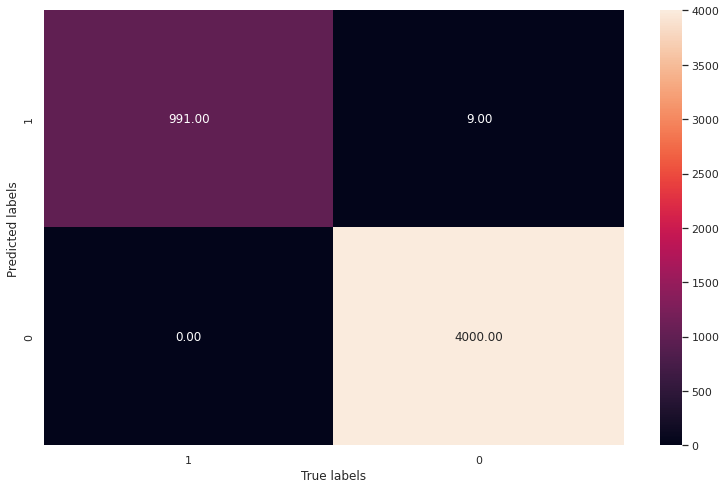

In [ ]:
import sklearn.metrics as metrics
import seaborn as sn

cm_dt = metrics.confusion_matrix(Y_test, y_preds)
sn.heatmap(cm_dt, annot=True,  fmt='.2f', xticklabels = [1, 0] , yticklabels = [1,0],cbar=True)
plt.xlabel('True labels',fontsize=12)
plt.ylabel('Predicted labels',fontsize=12)

sn.set(rc={'figure.figsize':(8,15)})

In [ ]:
print("Detection Accuracy: ",accuracy_score(Y_test, y_preds)*100,"%")

Detection Accuracy:  99.82 %


## Export Model

In [ ]:
import pickle

pickle.dump(model, open("ML_DecisionTree.pkl", "wb"))